In [38]:
# import pandas library 
import pandas as pd 

df = pd.read_csv(r'C:\Users\DISHANK\Documents\New folder\movies.csv') 

# Check the head of the data 
df.head() 
#Dataset movies consisting of different movies with genres

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
# Check out all the movies and their respective IDs 
movie_titles = pd.read_csv(r'C:\Users\DISHANK\Documents\New folder\ratings.csv') 
movie_titles.head() 
#Dataset ratings consist of ratings given by user for different movies

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [40]:
#Merge the 2 datasets
data = pd.merge(df, movie_titles, on='movieId') 
data.head() 


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,8,4.0,890492517


In [41]:
# Calculate mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 


title
Trailer Park Boys: The Movie (2006)                              5.0
All Star Comedy Jam (2009)                                       5.0
Night on the Galactic Railroad (Ginga-tetsudo no yoru) (1985)    5.0
Strange Magic (2015)                                             5.0
Kevin Hart: I'm a Grown Little Man (2009)                        5.0
Name: rating, dtype: float64

In [42]:
# Calculate count rating of all movies 
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 


title
Forrest Gump (1994)                 2350
Shawshank Redemption  The (1994)    2334
Pulp Fiction (1994)                 2304
Silence of the Lambs  The (1991)    2161
Matrix  The (1999)                  2057
Name: rating, dtype: int64

In [43]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 

ratings.head(10) 


,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",3.777778,9
#realityhigh (2017),3.000000,1
$ (Dollars) (1971),4.000000,1
$5 a Day (2008),3.666667,3
$9.99 (2008),2.666667,3
'71 (2014),3.363636,11
'Hellboy': The Seeds of Creation (2004),2.833333,3
'Neath the Arizona Skies (1934),3.250000,2
'R Xmas (2001),2.750000,2


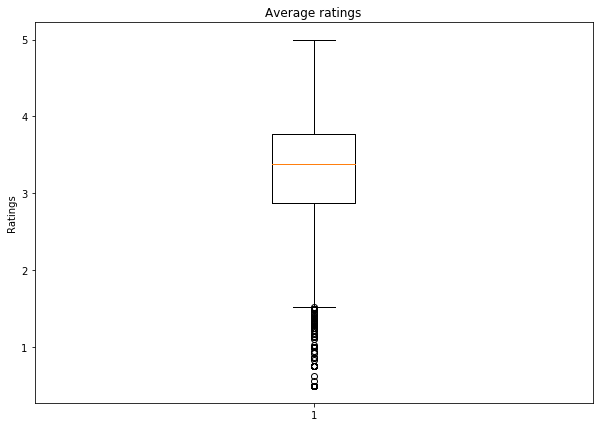

In [91]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# plot box plot graph of 'average ratings' to show ehich are the common rating given by user and which are the outliers. 

plt.figure(figsize =(10, 7)) 
plt.boxplot(ratings['rating'])
# Adding title  
plt.title("Average ratings")
plt.ylabel('Ratings')
plt.show()


In [44]:
#Narrowing down the genres of the movies
# Considering that 1st genre name in genre column of dataset is the closest or correct genre of the movie
#Splitting the genres column
import pandas as pd  
data.genres.str.split(expand=True)


,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
2,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
3,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
4,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
695235,Drama,War,None,None,None,None,None,None,None,None
695236,Drama,Fantasy,Thriller,None,None,None,None,None,None,None
695237,Action,Drama,War,None,None,None,None,None,None,None
695238,Drama,Thriller,None,None,None,None,None,None,None,None


In [45]:
#Naming the splitted columns 
data = data.set_index('title')
data1 = data['genres'].str.split(expand=True)
data1.columns = ['genres1', 'genres2','genres3','genres4','genres5','genres6','genres7','genres8','genres9','genres10']
data1.head()

,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,genres10
title,,,,,,,,,,
Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None


In [46]:
#Keeping the 1st column and dropping the rest genres
data1.drop(['genres2','genres3','genres4','genres5','genres6','genres7','genres8','genres9','genres10'], axis = 1, inplace = True)
data1.head()

,genres1
title,
Toy Story (1995),Adventure
Toy Story (1995),Adventure
Toy Story (1995),Adventure
Toy Story (1995),Adventure
Toy Story (1995),Adventure


In [47]:
#Concatenating the genre column with the merges Data dataframe
data = pd.concat([data, data1], axis = 1) 
data.head() 

,movieId,genres,userId,rating,timestamp,genres1
title,,,,,,
Toy Story (1995),1,Adventure Animation Children Comedy Fantasy,2,3.5,1141415820,Adventure
Toy Story (1995),1,Adventure Animation Children Comedy Fantasy,3,4.0,1439472215,Adventure
Toy Story (1995),1,Adventure Animation Children Comedy Fantasy,4,3.0,1573944252,Adventure
Toy Story (1995),1,Adventure Animation Children Comedy Fantasy,5,4.0,858625949,Adventure
Toy Story (1995),1,Adventure Animation Children Comedy Fantasy,8,4.0,890492517,Adventure


In [48]:
# Data Manipulation before plotting bar graph
data['genres1'].replace({'(no' : 'No genres Mentioned'}, inplace=True)
ratings_genres = pd.DataFrame(data.groupby('genres1')['rating'].mean())
ratings_genres['num of ratings'] = pd.DataFrame(data.groupby('genres1')['rating'].count()) 
ratings_genres.head(40) 

,rating,num of ratings
genres1,,
Action,3.469278,207601
Adventure,3.570039,69847
Animation,3.567479,16405
Children,3.236768,13585
Comedy,3.457014,161959
Crime,3.864204,47483
Documentary,3.717698,7012
Drama,3.687317,130789
Fantasy,3.489245,2464


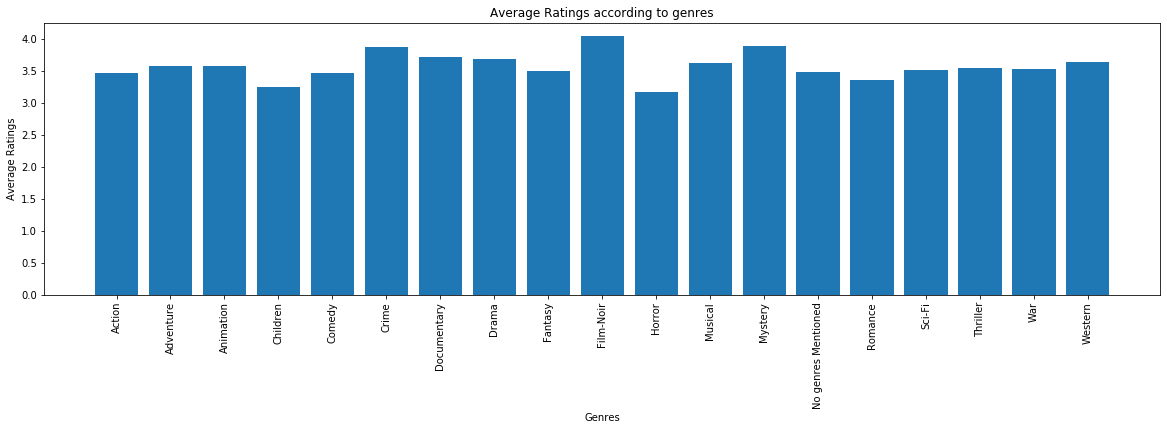

In [30]:
# creating the bar plot for genres with average rating
# Just exploring the dataset to answer which genre has the highest average rating
fig = plt.figure(figsize = (20, 5)) 
x = ['Action','Adventure','Animation','Children', 'Comedy','Crime','Documentary', 'Drama',
     'Fantasy','Film-Noir','Horror','Musical', 'Mystery','No genres Mentioned','Romance', 
     'Sci-Fi','Thriller','War','Western']
y = ratings_genres.rating.unique()
plt.bar(x,y) 
plt.xticks(rotation=90)
plt.xlabel("Genres") 
plt.ylabel("Average Ratings") 
plt.title("Average Ratings according to genres") 
plt.show()

In [49]:
#Creating a sub dataframe based on the genre of the film for whom recommendation is to be made
result_List_genres = data[data["genres1"] == "Romance"]
result_List_genres.head()

,movieId,genres,userId,rating,timestamp,genres1
title,,,,,,
Modern Affair A (1995),623,Romance,484,4.0,857579452,Romance
Modern Affair A (1995),623,Romance,1247,3.0,842871078,Romance
Jack and Sarah (1995),638,Romance,570,4.0,860192340,Romance
Jack and Sarah (1995),638,Romance,966,3.0,858466087,Romance
Jack and Sarah (1995),638,Romance,986,4.0,863360382,Romance


In [50]:
# creating dataframe with 'rating' count values for the sub dataframe
ratings = pd.DataFrame(result_List_genres.groupby('title')['rating'].mean()) 

ratings['num of ratings'] = pd.DataFrame(result_List_genres.groupby('title')['rating'].count()) 

ratings.head() 


,rating,num of ratings
title,,
A Christmas Kiss (2011),3.500000,1
A Christmas Prince (2017),2.500000,2
A Christmas Prince: The Royal Wedding (2018),2.750000,2
A Story of Water (1961),4.000000,1
Adjustment Bureau The (2011),3.726351,148


In [51]:
# Creating the Pivot Table and Sorting values according to the 'num of rating column' 
moviemat = result_List_genres.pivot_table(index ='userId', columns ='title', values ='rating') 

moviemat.head() 

ratings.sort_values('num of ratings', ascending = False).head(10) 



,rating,num of ratings
title,,
Meet Joe Black (1998),3.444767,172
Adjustment Bureau The (2011),3.726351,148
Life Less Ordinary A (1997),3.525000,60
Message in a Bottle (1999),3.028846,52
Paris I Love You (Paris je t'aime) (2006),3.821429,42
Enigma (2001),3.409091,33
Jetée La (1962),4.133333,30
Angel Eyes (2001),2.586207,29
In Love and War (1996),3.409091,22


In [54]:
# Analysing correlation with similar movies 
Jack_and_Sarah_ratings = moviemat['Jack and Sarah (1995)']  
Jack_and_Sarah_ratings.head() 

userId
3    NaN
19   NaN
23   NaN
27   NaN
31   NaN
Name: Jack and Sarah (1995), dtype: float64

In [55]:
# Analysing correlation with similar movies 
similar_to_Jack_and_Sarah = moviemat.corrwith(Jack_and_Sarah_ratings) 

cor_Jack_and_Sarah = pd.DataFrame(similar_to_Jack_and_Sarah, columns =['Correlation']) 
cor_Jack_and_Sarah.dropna(inplace = True) 

cor_Jack_and_Sarah.head(10) 


,Correlation
title,
Angel Eyes (2001),-1.000000
Code 46 (2003),-1.000000
Dirty Dancing: Havana Nights (2004),-1.000000
Enigma (2001),-1.000000
House of Mirth The (2000),1.000000
In Love and War (1996),-1.000000
Jack and Sarah (1995),1.000000
Kama Sutra: A Tale of Love (1996),-1.000000
Life Less Ordinary A (1997),0.327327


In [56]:
# Similar movies like Jack_and_Sarah with over 20 reviews from users
cor_Jack_and_Sarah.sort_values('Correlation', ascending = False).head(10) 
cor_Jack_and_Sarah = cor_Jack_and_Sarah.join(ratings['num of ratings']) 

cor_Jack_and_Sarah.head() 

cor_Jack_and_Sarah[cor_Jack_and_Sarah['num of ratings']>20].sort_values('Correlation', ascending = False).head() 


,Correlation,num of ratings
title,,
Meet Joe Black (1998),0.754337,172
Life Less Ordinary A (1997),0.327327,60
Message in a Bottle (1999),-0.755929,52
In Love and War (1996),-1.000000,22
Angel Eyes (2001),-1.000000,29
